<a href="https://colab.research.google.com/github/hhtnghia321/AdvM---SVM-assignment---Student-Math-Performance/blob/master/SVM_Kernel_Method_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##SVM - Kernel Method Assignment

I choose to use the Student Math Performance for this assignment. The problem is classification problem the student grade on Math of Portuguese School of the 1st year student.

Data Set Information:

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).


Attribute Information:
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets: 

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 

2 sex - student's sex (binary: 'F' - female or 'M' - male) 

3 age - student's age (numeric: from 15 to 22) 

4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 

13 traveltime - home to school travel time (numeric: 1 - 15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - 1 hour) 

14 studytime - weekly study time (numeric: 1 - 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - 10 hours) 

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 

16 schoolsup - extra educational support (binary: yes or no) 

17 famsup - family educational support (binary: yes or no) 

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 

19 activities - extra-curricular activities (binary: yes or no) 

20 nursery - attended nursery school (binary: yes or no) 

21 higher - wants to take higher education (binary: yes or no) 

22 internet - Internet access at home (binary: yes or no) 

23 romantic - with a romantic relationship (binary: yes or no) 

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 

29 health - current health status (numeric: from 1 - very bad to 5 - very good) 

30 absences - number of school absences (numeric: from 0 to 93) 

31 G1 - first period grade (numeric: from 0 to 20) (target variable)

##Loading Dataset and Library

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import cross_val_score

data = pd.read_csv("https://raw.githubusercontent.com/hhtnghia321/AdvM---SVM-assignment---Student-Math-Performance/master/student-mat.csv",
                   sep = ";")
data = data.copy().drop(["G2", "G3"],1)


In [47]:
data

school sex  age address famsize  ... Dalc  Walc  health absences  G1
0       GP   F   18       U     GT3  ...    1     1       3        6   5
1       GP   F   17       U     GT3  ...    1     1       3        4   5
2       GP   F   15       U     LE3  ...    2     3       3       10   7
3       GP   F   15       U     GT3  ...    1     1       5        2  15
4       GP   F   16       U     GT3  ...    1     2       5        4   6
..     ...  ..  ...     ...     ...  ...  ...   ...     ...      ...  ..
390     MS   M   20       U     LE3  ...    4     5       4       11   9
391     MS   M   17       U     LE3  ...    3     4       2        3  14
392     MS   M   21       R     GT3  ...    3     3       3        3  10
393     MS   M   18       R     LE3  ...    3     4       5        0  11
394     MS   M   19       U     LE3  ...    3     3       5        5   8

[395 rows x 31 columns]

In [48]:
for i in data.keys():
    print(data[i].unique())

['GP' 'MS']
['F' 'M']
[18 17 15 16 19 22 20 21]
['U' 'R']
['GT3' 'LE3']
['A' 'T']
[4 1 3 2 0]
[4 1 2 3 0]
['at_home' 'health' 'other' 'services' 'teacher']
['teacher' 'other' 'services' 'health' 'at_home']
['course' 'other' 'home' 'reputation']
['mother' 'father' 'other']
[2 1 3 4]
[2 3 1 4]
[0 3 2 1]
['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['no' 'yes']
['no' 'yes']
[4 5 3 1 2]
[3 2 4 1 5]
[4 3 2 1 5]
[1 2 5 3 4]
[1 3 2 4 5]
[3 5 1 2 4]
[ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
[ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]


* All of the variables is categorical variable which make it not a good candidate for Support Vector Machine because The SVM utilizes the kernel trick which is matrix multiplication which not make so much sense for classification
* ALso, the Target variable is multiple class which is more than 10 class and this may be hard for SVM.

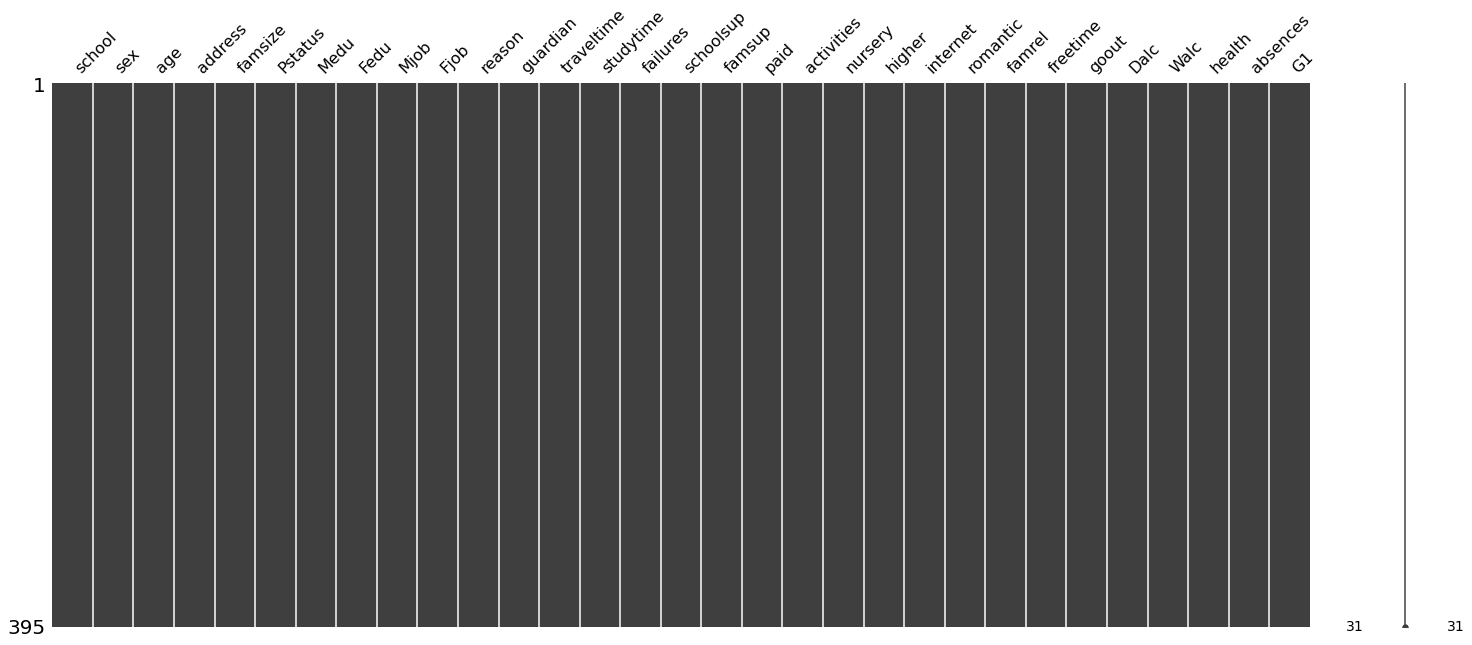

In [49]:
import missingno as miss
miss.matrix(data)
#no missing data


Counter({2: 156, 3: 128, 1: 111})


(array([111.,   0.,   0.,   0.,   0., 156.,   0.,   0.,   0., 128.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

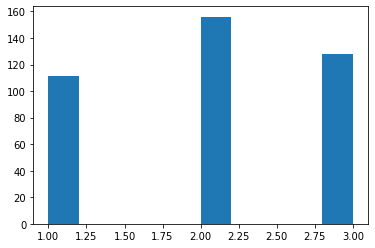

In [65]:
print(Counter(data["G1"]))
plt.hist(data["G1"])

* the data is more of center clustered

* We can see that those encoded variable not have linear relationship with the G1 (target) variables.
* So, as for the suppose of experimenting SVM, We would binning down the target variable in to 3 class: "good", "avg" (Average), "bad".

bad: 1-7

avg: 8-13

good: 14-20

* We choose this range because there are many data cluster at the midle so the midle range should be shorter than others to balance the data


In [64]:
#Binning the target variable
data.G1 =  data.G1.replace([1,2,3,4,5,6,7,8], 1)
data.G1 =  data.G1.replace([9,10,11,12], 2)
data.G1 =  data.G1.replace([13,14,15,16,17,18,19,20], 3)

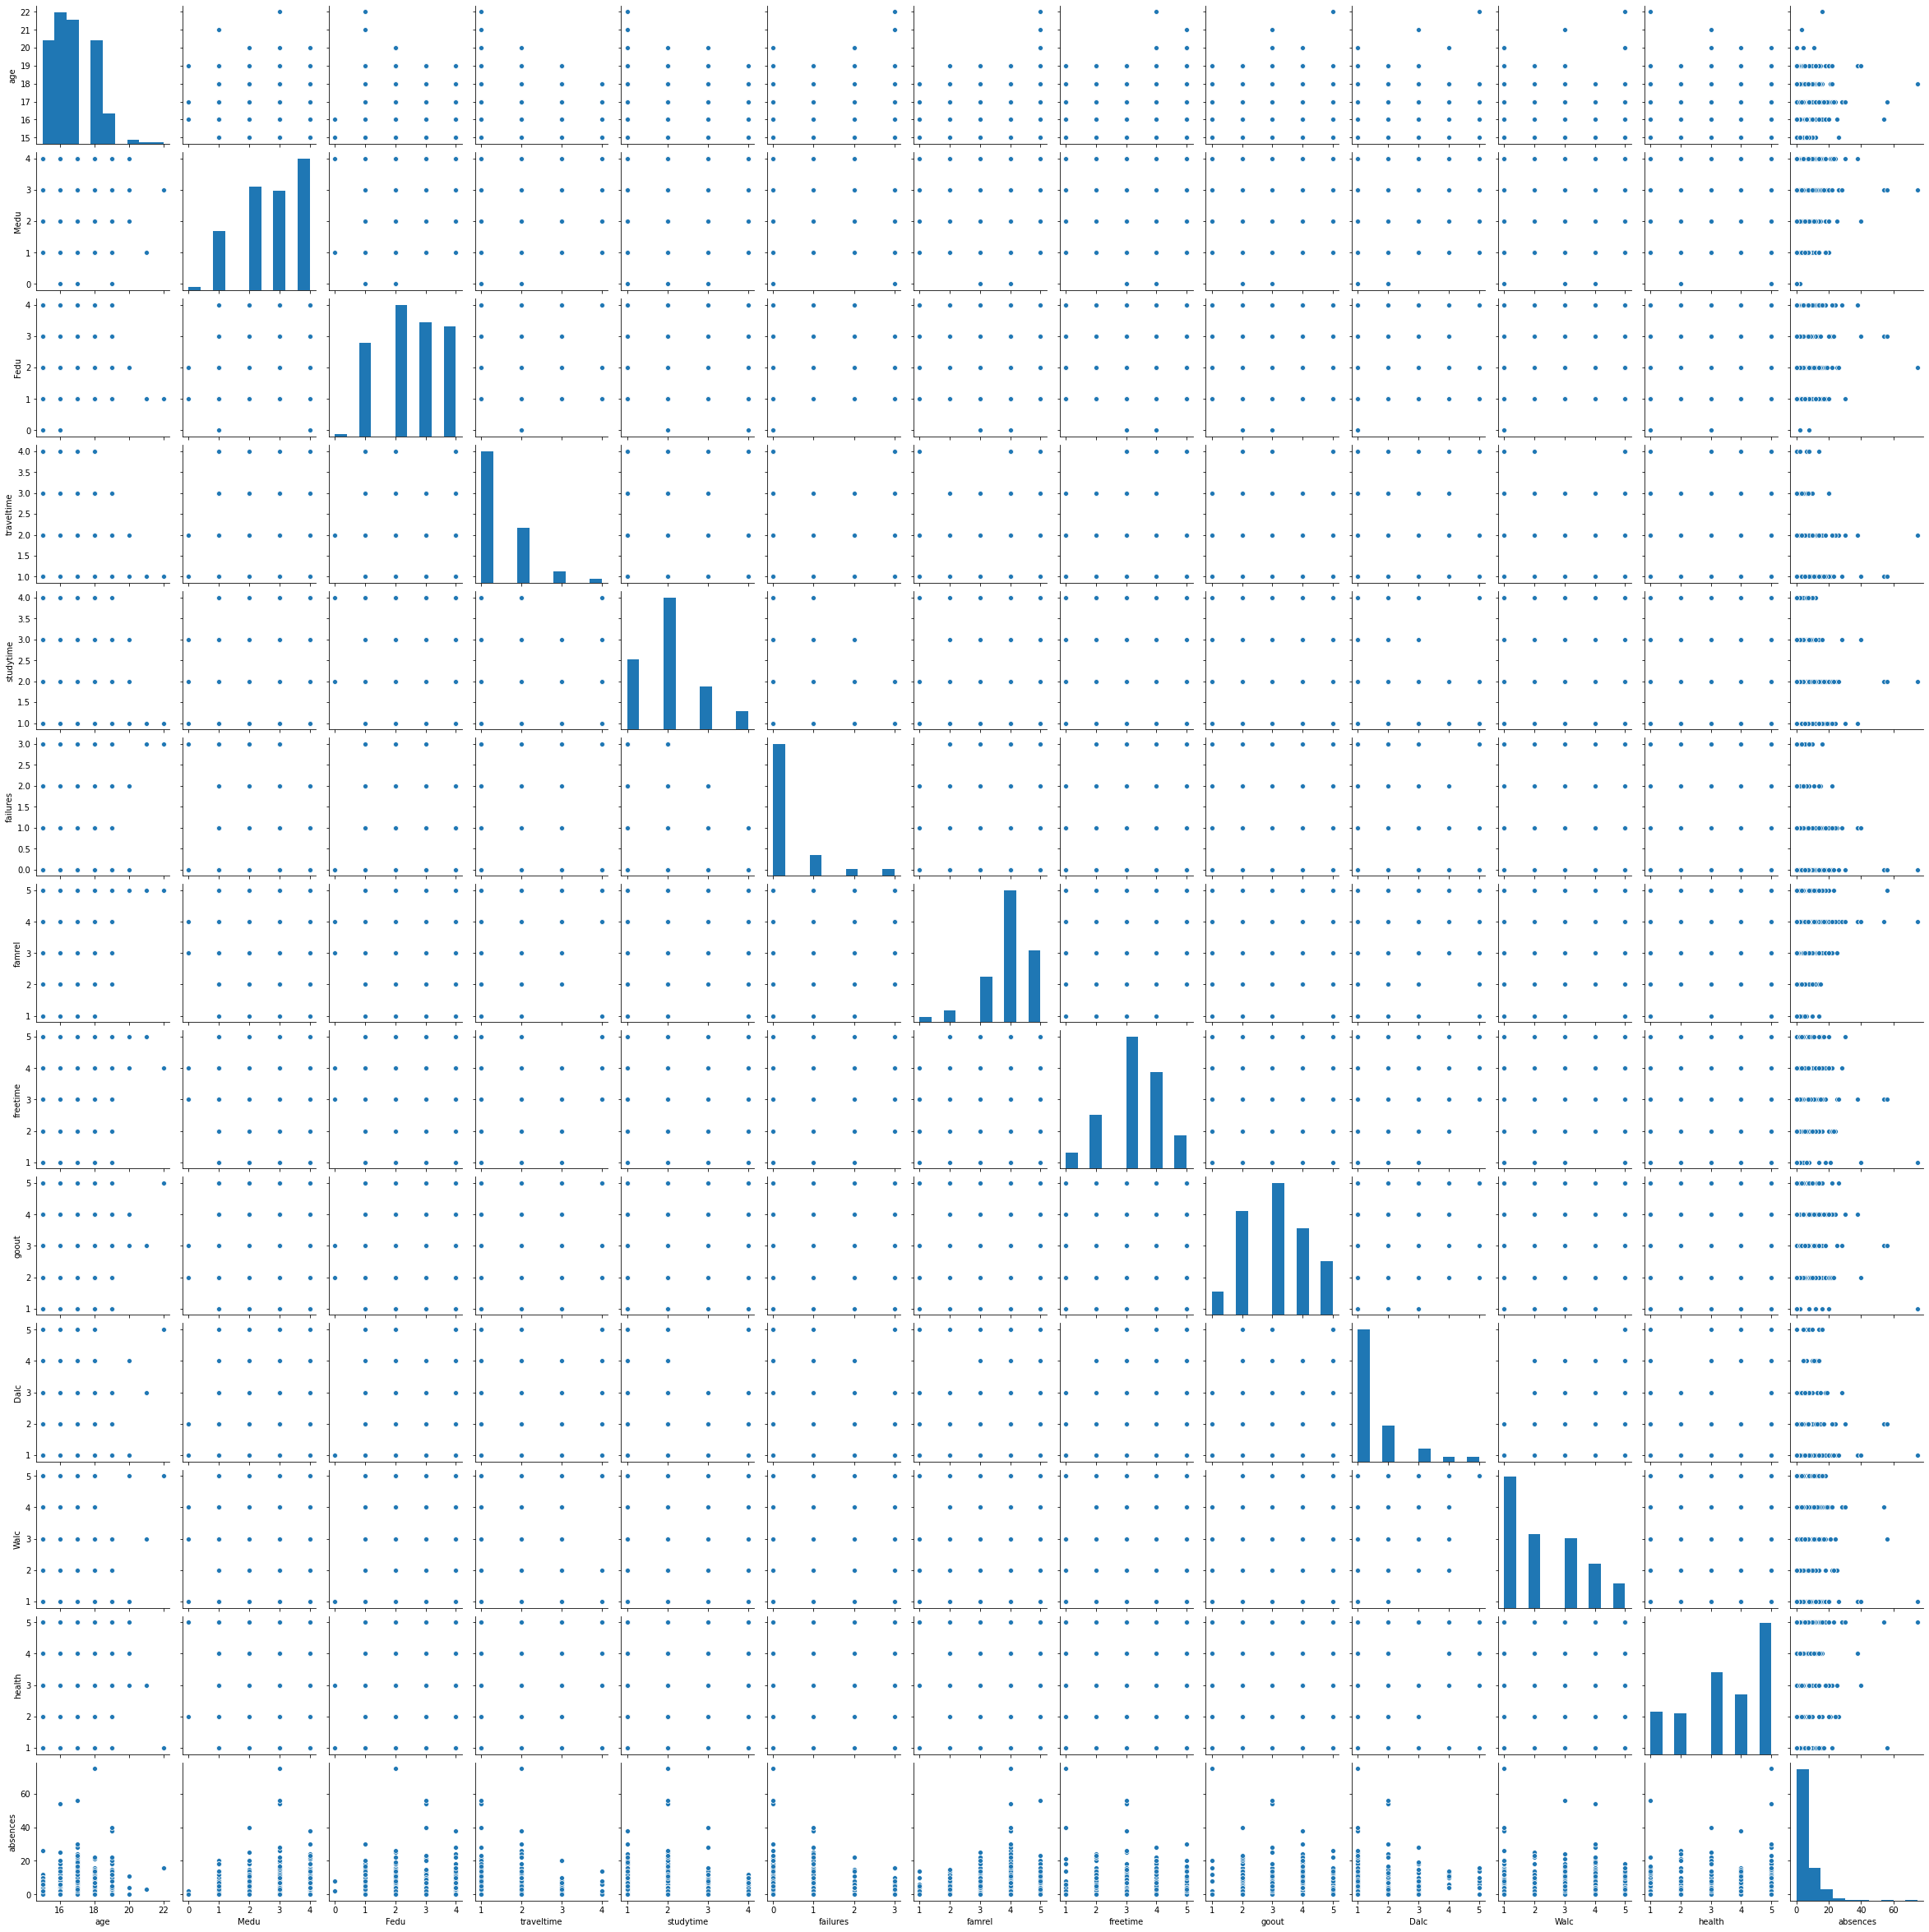

In [74]:
sns.pairplot(data)

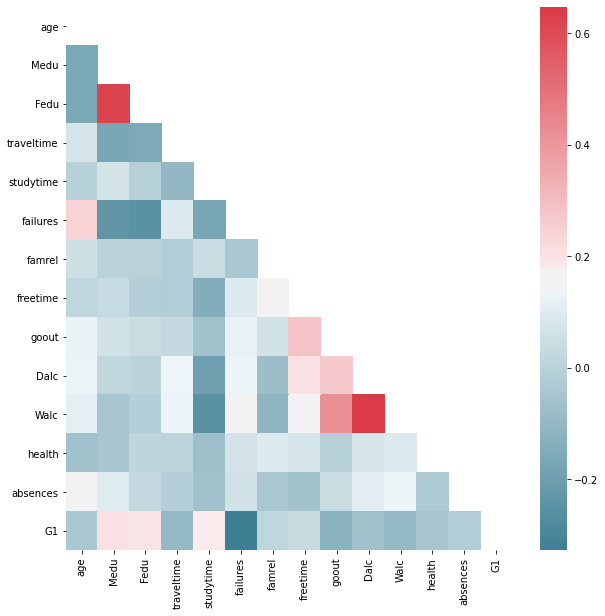

In [67]:
cor = data.corr()
mask = np.triu(np.ones_like(cor, dtype=np.bool) )
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=[10,10])
sns.heatmap(cor, mask=mask, cmap=cmap)

In [69]:
Y = data["G1"]
data.drop(["G1"],1, inplace=True)
X_train, X_test,y_train, y_test = train_test_split(data, Y, test_size = 0.3, random_state= 123)

## Run the SVM on baseline model
* Since, The SVM model of Sklearn not accept the categorical input. So, we have to put some preprocessing step 
* Fortunately, There are no continuous numberical variable so no standization is needed.
1. OneHotEncoder: to encode nominal variables


In [70]:
#One Hot Encoder
X_train_OHE = pd.get_dummies(X_train,drop_first=True)
#OrdinalEncoder: to encode ordinal variables (traveltime, studytime, failures, famrel, freetime, goout, Dalc, Walc, health)'
X_train_OHE


age  Medu  Fedu  ...  higher_yes  internet_yes  romantic_yes
5     16     4     3  ...           1             1             0
240   17     4     3  ...           1             1             1
241   17     4     4  ...           1             1             0
19    16     4     3  ...           1             1             0
29    16     4     4  ...           1             1             1
..   ...   ...   ...  ...         ...           ...           ...
230   17     4     3  ...           1             1             1
98    16     4     4  ...           1             1             0
322   17     2     2  ...           1             1             0
382   17     2     3  ...           1             1             0
365   18     1     3  ...           1             0             0

[276 rows x 39 columns]

##Fitting the SVM
There are few SVM implementation on the market right now:
* SVM Light: SVM programm in C Language
* LIBSVM : library Support Vector Machine
* SVMTorch II: SVMTorch II designed for efficiently solve large-scale regression problems (more than 20000 examples). 
* SVMSequel: The underlying training algorithm used in SVMsequel is based on the kernel minover algorithm, which gives comparable performance to the more popular sequential minimal optimization (SMO) algorithms employed by most other SVM systems.
* TinySVM: TinySVM is an implementation of Support Vector Machines (SVMs) [Vapnik 95], [Vapnik 98] in 2002

In this assignment I only choose to use Sklearn SVM framework for this assignment because of these following reason:
* sklearn also have other preprocessing, cleaning and model_selection framework which make it much easier to proprocess and validate the model
* sklearn is widely used, good for industry practice
* sklearn uses the same implementation as LBSVM



1. The Baseline model of Support Vector Classification (sklearn)

In [73]:
svm1 = svm.SVC()
svm1.fit(X_train_OHE, y_train)
score_blsvm = cross_val_score(svm1, X_train_OHE, y_train, cv = 10)
print(score_blsvm)
print("Average Score: ",score_blsvm.mean())

[0.42857143 0.32142857 0.42857143 0.42857143 0.42857143 0.46428571
 0.37037037 0.40740741 0.37037037 0.33333333]
Average Score:  0.39814814814814814


* the result is relatively poor because we only use the simple linear Kernel function, latter on we will try more kind of Kernel function

2. Support Vector Machine with Radial Basis Function

The RBF has the form of: $K(x, x') = \exp \left(-\gamma\left\|x-x^{\prime}\right\|^{2}\right)$
* The $\gamma$ parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.
* The $C$ parameter trades off correct classification of training examples against maximization of the decision function’s margin (regularization parameter)

In [76]:
svm_rbf = svm.SVC(kernel="rbf")
svm_rbf.fit(X_train_OHE, y_train)
score_svm_rbf = cross_val_score(svm_rbf, X_train_OHE, y_train, cv = 10)
print(score_svm_rbf)
print("Average Score: ",score_svm_rbf.mean())

[0.42857143 0.32142857 0.42857143 0.42857143 0.42857143 0.46428571
 0.37037037 0.40740741 0.37037037 0.33333333]
Average Score:  0.39814814814814814
